# Ajuste de curvas por principio de máxima verosimilitud.

![BLR](https://upload.wikimedia.org/wikipedia/commons/e/ed/Residuals_for_Linear_Regression_Fit.png)

> **Objetivos:**
> - Recordar el ajuste de curvas polinomiales.
> - Entender el fenómeno de overfitting en casos prácticos.
> - Explicar los mínimos cuadrados ordinaros mediante el principio de máxima verosimilitud.

> **Referencias:**
> 
> - Pattern Recognition and Machine Learning, by Christopher M. Bishop - Cap. 3.1.

## 1. Introducción

Suponga que tenemos un conjunto de entrenamiento con $N$ observaciones de $x$, 

$$[x_1, \dots, x_N],$$

en conjunto con las observaciones correspondientes de la variable objetivo $y$, 

$$[y_1, \dots, y_N].$$

En la siguiente gráfica mostramos datos de entrenamiento, con $N=20$. Estos datos se generaron eligiendo $x$ uniformemente espaciados en el intervalo $[0, 1]$, y la variable objetivo $y$ como el resultado de la función $\sin (2 \pi x)$ más un pequeño ruido distribuido normal:

In [1]:
# Importamos librerías
from matplotlib import pyplot as plt
import numpy as np

In [2]:
# Generamos datos ficticios
N = 20
x = np.linspace(0, 1, N)
y = np.sin(2 * np.pi * x) + 0.3 * np.random.normal(size=N)

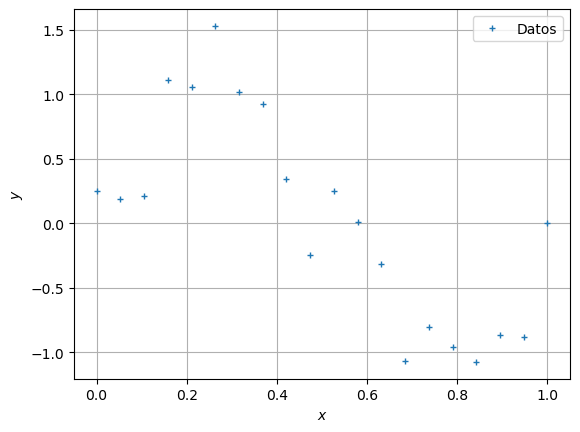

In [3]:
# Gráfica de los datos
plt.plot(x, y, '+', ms=5, label='Datos')
plt.xlabel("$x$")
plt.ylabel("$y$")
plt.grid()
plt.legend(loc="best")

Nuestro objetivo es explotar estos datos de entrenamiento para hacer predicciones $\hat{y}$ de la variable objetivo para algún nuevo valor de la variable de entrada.

Esta es una tarea compleja, que implica "descubrir" la función subyacente $\sin(2 \pi x)$ a partir de un conjunto finito de datos. Además, los datos observados están corruptos con ruido, haciendo que el valor de $y$ tenga incertidumbre. Como ya vimos, la teoría de probabilidad nos da un marco de trabajo para expresar dicha incertidumbre de una forma precisa y cuantitativa.

Antes de formular el problema de forma probabilística, procedamos "informalmente" y de forma más intuitiva. Lo que queremos hacer es ajustar a los datos una función polinomial de la forma:

$$
f(x, w) = w_0 + w_1 x + w_2 x^{2} + \dots + w_M x^{M} = \sum_{j=0}^{M} w_j x^j.
$$

Notamos que aunque $f$ es una función no lineal de $x$, es una función **lineal respecto a los coeficientes $w$**.

Los valores de los coeficientes serán determinados ajustando el polinomio a los datos de entrenamiento. Esto se puede lograr minimizando una **función de error** que mide la falta de ajuste entre la función $f(x, w)$ y los datos de entrenamiento.

Una elección comúnmente usada para esta función de error está dada por la suma de cuadrados de los errores entre las predicciones sobre los datos de entrenamiento $f(x_n,w)$ y los valores correspondientes del objetivo $y_n$, de forma que minimizaremos:

$$
E(w) = \frac{1}{2}\sum_{n=1}^{N}\left(f(x_n, w) - y_n\right)^2.
$$

La intuición detrás de esta función de error es que siempre es no-negativa, y es cero si y solo si la función $f(x, w)$ pasara exactamente por todos los puntos de entrenamiento. La interpretación geométrica de la función de error se encuentra en la figura del encabezado.

De forma que podemos resolver el problema de ajuste de curvas mediante la elección de $w$ para la cual $E(w)$ sea lo más pequeña posible.

**Nota.** Dado que $E(w)$ es una función cuadrática de los coeficientes $w$, sus derivadas respecto a los coeficientes serán lineales respecto a $w$, y el problema de minimización tendrá solución única.

### Expresión matricial de la función objetivo

Antes de continuar, conviene obtener una representación más compacta del problema anterior. Comencemos por trabajar con el polinomio, dándonos cuenta de que este es un producto punto entre los coeficientes $w$ y las potencias de $x$:

$$
f(x, w) = w_0 + w_1 x + w_2 x^{2} + \dots + w_M x^{M} = \underbrace{[1 \quad x \quad x^2 \quad \dots \quad x^M]}_{\phi(x)^T} \underbrace{\left[\begin{array}{c} w_0 \\ w_1 \\ w_2 \\ \vdots \\ w_M\end{array}\right]}_{w} = \phi(x)^T w,
$$


Ahora, por otra parte, recordemos la definición de la norma euclidiana de un vector. Si tenemos un vector 

$$
v = \left[\begin{array}{c} v_1 \\ v_2 \\ \vdots \\ v_s\end{array}\right]
$$

la norma euclidiana de $v$ es

$$
||v|| = \sqrt{v_1^2 + v_2^2 + \dots + v_s^2},
$$

o equivalentemente $||v||^2 = v_1^2 + v_2^2 + \dots + v_s^2 = \sum_{i=1}^{s} v_i^2$.

Con lo anterior, notemos que la función de error la podemos reescribir en términos de la norma de un vector:

$$
E(w) = \frac{1}{2}\sum_{n=1}^{N}\left(f(x_n, w) - y_n\right)^2 = \frac{1}{2}\sum_{n=1}^{N}\left(\phi(x_n)^T w - y_n\right)^2 = \frac{1}{2}||\alpha||^2,
$$

donde el vector $\alpha$ es:

$$
\begin{align}\nonumber
\alpha & = & \left[\begin{array}{c} \phi(x_1)^T w - y_1 \\ \phi(x_2)^T w - y_2 \\ \vdots \\ \phi(x_N)^T w - y_N\end{array}\right] \\ \nonumber
       & = & \underbrace{\left[\begin{array}{ccc} - & \phi(x_1)^T & - \\ - & \phi(x_2)^T & - \\ & \vdots & \\ - & \phi(x_N)^T & -\end{array}\right]}_{\Phi} w - \underbrace{\left[\begin{array}{c} y_1 \\ y_2 \\ \vdots \\ y_N\end{array}\right]}_{y} \\ \nonumber
       & = & \Phi w - y
\end{align}
$$

De este modo, queremos encontrar

$$
\hat{w} = \arg \min_{w} \frac{1}{2} ||\Phi w - y||^2.
$$

## 2. ¿Cómo hacemos esto con Scikit-Learn?

### Ajuste de curvas

In [4]:
# sklearn.model_selection.train_test_split
from sklearn.model_selection import train_test_split
# sklearn.preprocessing.PolynomialFeatures
from sklearn.preprocessing import PolynomialFeatures
# sklearn.linear_model.LinearRegression
from sklearn.linear_model import LinearRegression
# sklearn.preprocessing.StandardScaler
from sklearn.preprocessing import StandardScaler
# sklearn.pipeline.Pipeline
from sklearn.pipeline import Pipeline

In [5]:
# Explicar PolynomialFeatures y su relación con Phi
PolynomialFeatures(10).fit_transform([[10], [20], [30]])

array([[1.0000e+00, 1.0000e+01, 1.0000e+02, 1.0000e+03, 1.0000e+04,
        1.0000e+05, 1.0000e+06, 1.0000e+07, 1.0000e+08, 1.0000e+09,
        1.0000e+10],
       [1.0000e+00, 2.0000e+01, 4.0000e+02, 8.0000e+03, 1.6000e+05,
        3.2000e+06, 6.4000e+07, 1.2800e+09, 2.5600e+10, 5.1200e+11,
        1.0240e+13],
       [1.0000e+00, 3.0000e+01, 9.0000e+02, 2.7000e+04, 8.1000e+05,
        2.4300e+07, 7.2900e+08, 2.1870e+10, 6.5610e+11, 1.9683e+13,
        5.9049e+14]])

In [6]:
LinearRegression?

Init signature:
LinearRegression(
    *,
    fit_intercept=True,
    copy_X=True,
    n_jobs=None,
    positive=False,
)
Docstring:     
Ordinary least squares Linear Regression.

LinearRegression fits a linear model with coefficients w = (w1, ..., wp)
to minimize the residual sum of squares between the observed targets in
the dataset, and the targets predicted by the linear approximation.

Parameters
----------
fit_intercept : bool, default=True
    Whether to calculate the intercept for this model. If set
    to False, no intercept will be used in calculations
    (i.e. data is expected to be centered).

copy_X : bool, default=True
    If True, X will be copied; else, it may be overwritten.

n_jobs : int, default=None
    The number of jobs to use for the computation. This will only provide
    speedup in case of sufficiently large problems, that is if firstly
    `n_targets > 1` and secondly `X` is sparse or if `positive` is set
    to `True`. ``None`` means 1 unless in a
    :obj:`

#### Grado 3

In [7]:
# Definición del modelo
model3 = Pipeline(steps=[
    ('poly', PolynomialFeatures(3)),
    ('scaler', StandardScaler()),
    ('model', LinearRegression())
])

In [8]:
model3

Pipeline(steps=[('poly', PolynomialFeatures(degree=3)),
                ('scaler', StandardScaler()), ('model', LinearRegression())])

In [9]:
help(train_test_split)

Help on function train_test_split in module sklearn.model_selection._split:

train_test_split(*arrays, test_size=None, train_size=None, random_state=None, shuffle=True, stratify=None)
    Split arrays or matrices into random train and test subsets.
    
    Quick utility that wraps input validation,
    ``next(ShuffleSplit().split(X, y))``, and application to input data
    into a single call for splitting (and optionally subsampling) data into a
    one-liner.
    
    Read more in the :ref:`User Guide <cross_validation>`.
    
    Parameters
    ----------
    *arrays : sequence of indexables with same length / shape[0]
        Allowed inputs are lists, numpy arrays, scipy-sparse
        matrices or pandas dataframes.
    
    test_size : float or int, default=None
        If float, should be between 0.0 and 1.0 and represent the proportion
        of the dataset to include in the test split. If int, represents the
        absolute number of test samples. If None, the value is set to

In [10]:
# Split train/test
x_train, x_test, y_train, y_test = train_test_split(
    x.reshape(-1, 1), y, test_size=0.2
)
# partition = 16
# x_train = x[:partition].reshape(-1, 1)
# y_train = y[:partition]
# x_test = x[partition:].reshape(-1, 1)
# y_test = y[partition:]

In [11]:
# Ajuste del modelo
model3.fit(x_train, y_train)

Pipeline(steps=[('poly', PolynomialFeatures(degree=3)),
                ('scaler', StandardScaler()), ('model', LinearRegression())])

In [12]:
# Coeficientes de la regresión lineal
model3.named_steps['model'].coef_

array([  0.        ,   5.10004275, -14.26850051,   8.71339762])

In [13]:
# Score sobre datos de entrenamiento
model3.score(x_train, y_train)

0.9435792804949372

In [14]:
# Score sobre datos de prueba
model3.score(x_test, y_test)

-6.1395030121051715

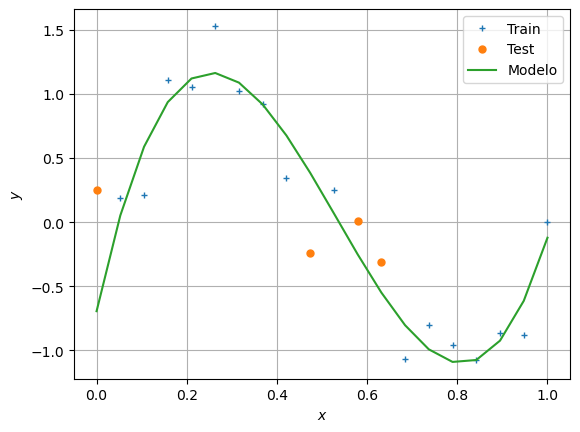

In [15]:
plt.plot(x_train, y_train, '+', ms=5, label='Train')
plt.plot(x_test, y_test, 'o', ms=5, label='Test')
plt.plot(x, model3.predict(x.reshape(-1, 1)), label='Modelo')
plt.xlabel("$x$")
plt.ylabel("$y$")
plt.grid()
plt.legend(loc="best")

#### Grado 10

In [16]:
# Definición del modelo
model10 = Pipeline(steps=[
    ('poly', PolynomialFeatures(10)),
    ('scaler', StandardScaler()),
    ('model', LinearRegression())
])

In [17]:
# Ajuste del modelo
model10.fit(x_train, y_train)

Pipeline(steps=[('poly', PolynomialFeatures(degree=10)),
                ('scaler', StandardScaler()), ('model', LinearRegression())])

In [18]:
# Score sobre datos de entrenamiento
model10.score(x_train, y_train), model3.score(x_train, y_train)

(0.9716102343442177, 0.9435792804949372)

In [20]:
# Score sobre datos de prueba
model10.score(x_test, y_test), model3.score(x_test, y_test)

(-9.050056685623426, -6.1395030121051715)

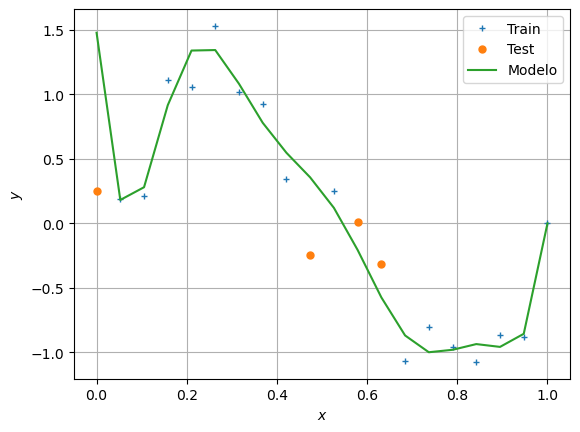

In [21]:
plt.plot(x_train, y_train, '+', ms=5, label='Train')
plt.plot(x_test, y_test, 'o', ms=5, label='Test')
plt.plot(x, model10.predict(x.reshape(-1, 1)), label='Modelo')
plt.xlabel("$x$")
plt.ylabel("$y$")
plt.grid()
plt.legend(loc="best")

### Overfitting

Los parámetros de modelo se están sobreajustando a los datos de entrenamiento. Lo podemos observar a través del score sobre los datos de entrenamiento, el cual es muy alto.

Sin embargo, este modelo (sobreajustado) tiene un poder de generalización (poder de predicción sobre datos no vistos) bastante malo, lo cual podemos ver en el score sobre los datos de test.

In [22]:
# Coeficientes del modelo de grado 3
model3.named_steps['model'].coef_

array([  0.        ,   5.10004275, -14.26850051,   8.71339762])

In [23]:
# Coeficientes del modelo de grado 10
model10.named_steps['model'].coef_

array([ 0.00000000e+00, -1.18578048e+01,  5.62891513e+01,  9.91512792e+02,
       -1.01471826e+04,  4.13576092e+04, -9.31565463e+04,  1.25212312e+05,
       -1.00051325e+05,  4.38913173e+04, -8.14259665e+03])

El modelo, mientras más complejo, hace un gran esfuerzo por ajustarse a los datos entrenamiento. Esto lo podemos ver en el valor de los parámetros encontrados.

Ante un dato no visto, el modelo va a generalizar de forma muy pobre.

### ¿Cómo lidiar con el overfitting? 

#### 1. Regularización

In [24]:
# Importar sklearn.linear_model.Ridge
from sklearn.linear_model import Ridge

In [173]:
help(Ridge)

Help on class Ridge in module sklearn.linear_model._ridge:

class Ridge(sklearn.base.MultiOutputMixin, sklearn.base.RegressorMixin, _BaseRidge)
 |  Ridge(alpha=1.0, *, fit_intercept=True, copy_X=True, max_iter=None, tol=0.0001, solver='auto', positive=False, random_state=None)
 |  
 |  Linear least squares with l2 regularization.
 |  
 |  Minimizes the objective function::
 |  
 |  ||y - Xw||^2_2 + alpha * ||w||^2_2
 |  
 |  This model solves a regression model where the loss function is
 |  the linear least squares function and regularization is given by
 |  the l2-norm. Also known as Ridge Regression or Tikhonov regularization.
 |  This estimator has built-in support for multi-variate regression
 |  (i.e., when y is a 2d-array of shape (n_samples, n_targets)).
 |  
 |  Read more in the :ref:`User Guide <ridge_regression>`.
 |  
 |  Parameters
 |  ----------
 |  alpha : {float, ndarray of shape (n_targets,)}, default=1.0
 |      Constant that multiplies the L2 term, controlling regula

In [25]:
# Definición del modelo
model10_ridge = Pipeline(steps=[
    ('poly', PolynomialFeatures(10)),
    ('scaler', StandardScaler()),
    ('model', Ridge(alpha=1e-3))
])

In [26]:
# Ajuste del modelo
model10_ridge.fit(x_train, y_train)

Pipeline(steps=[('poly', PolynomialFeatures(degree=10)),
                ('scaler', StandardScaler()), ('model', Ridge(alpha=0.001))])

In [29]:
# Score sobre datos de entrenamiento
model10_ridge.score(x_train, y_train), model10.score(x_train, y_train), model3.score(x_train, y_train)

(0.9438472473292742, 0.9716102343442177, 0.9435792804949372)

In [30]:
# Score sobre datos de prueba
model10_ridge.score(x_test, y_test), model10.score(x_test, y_test), model3.score(x_test, y_test)

(-4.125252782919652, -9.050056685623426, -6.1395030121051715)

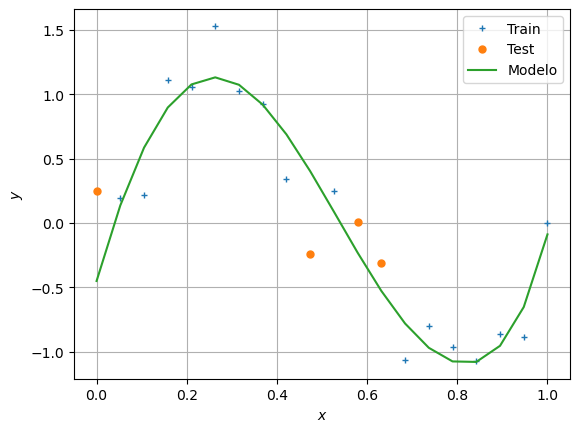

In [31]:
plt.plot(x_train, y_train, '+', ms=5, label='Train')
plt.plot(x_test, y_test, 'o', ms=5, label='Test')
plt.plot(x, model10_ridge.predict(x.reshape(-1, 1)), label='Modelo')
plt.xlabel("$x$")
plt.ylabel("$y$")
plt.grid()
plt.legend(loc="best")

In [32]:
# Coeficientes
model10_ridge.named_steps['model'].coef_

array([ 0.        ,  3.89177196, -8.36943104, -0.94957727,  3.62457505,
        3.24332702,  0.72984557, -1.53557818, -2.29123899, -1.05057575,
        2.24789886])

In [33]:
model3.named_steps['model'].coef_

array([  0.        ,   5.10004275, -14.26850051,   8.71339762])

In [34]:
model10.named_steps['model'].coef_

array([ 0.00000000e+00, -1.18578048e+01,  5.62891513e+01,  9.91512792e+02,
       -1.01471826e+04,  4.13576092e+04, -9.31565463e+04,  1.25212312e+05,
       -1.00051325e+05,  4.38913173e+04, -8.14259665e+03])

#### 2. Más datos

In [35]:
# Generamos datos ficticios
N = 500
x = np.linspace(0, 1, N)
y = np.sin(2 * np.pi * x) + 0.3 * np.random.normal(size=N)

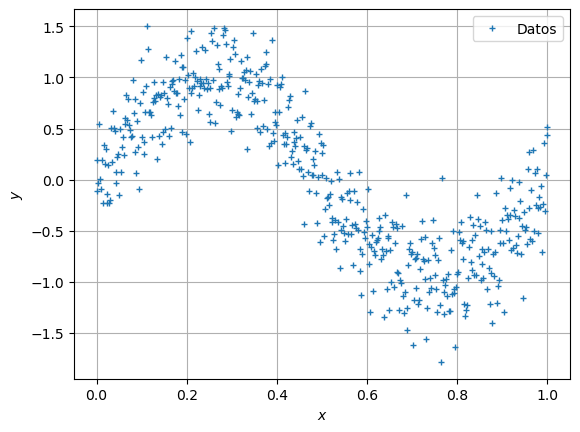

In [36]:
# Gráfica de los datos
plt.plot(x, y, '+', ms=5, label='Datos')
plt.xlabel("$x$")
plt.ylabel("$y$")
plt.grid()
plt.legend(loc="best")

In [37]:
# Split train/test
x_train, x_test, y_train, y_test = train_test_split(
    x.reshape(-1, 1), y, test_size=0.2
)

In [38]:
# Definición del modelo - Modelo de grado 10 sin regularización
model10

Pipeline(steps=[('poly', PolynomialFeatures(degree=10)),
                ('scaler', StandardScaler()), ('model', LinearRegression())])

In [39]:
# Ajuste del modelo
model10.fit(x_train, y_train)

Pipeline(steps=[('poly', PolynomialFeatures(degree=10)),
                ('scaler', StandardScaler()), ('model', LinearRegression())])

In [40]:
# Score sobre datos de entrenamiento
model10.score(x_train, y_train)

0.8502013741019266

In [41]:
# Score sobre datos de prueba
model10.score(x_test, y_test)

0.8513467994613533

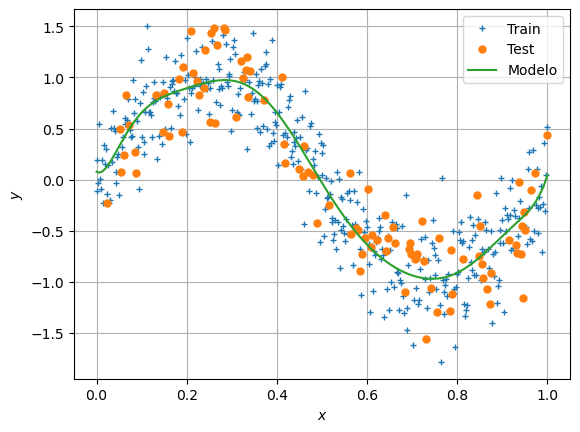

In [42]:
plt.plot(x_train, y_train, '+', ms=5, label='Train')
plt.plot(x_test, y_test, 'o', ms=5, label='Test')
plt.plot(x, model10.predict(x.reshape(-1, 1)), label='Modelo')
plt.xlabel("$x$")
plt.ylabel("$y$")
plt.grid()
plt.legend(loc="best")

In [43]:
# Siempre incluir términos de regularización
model10_ridge

Pipeline(steps=[('poly', PolynomialFeatures(degree=10)),
                ('scaler', StandardScaler()), ('model', Ridge(alpha=0.001))])

## 3. Distribución normal

Antes de entrar en detalles repasemos un poco la distribución normal.

### 3.1. Distribución normal univariada

Se dice que una VA distribuye normal si su función de densidad de probabilidad es:

$$
\mathcal{N}(x|\mu, \sigma^2) = \frac{1}{\sqrt{2 \pi \sigma^2}} \exp \left\{-\frac{(x - \mu)^2}{2 \sigma^2}\right\}
$$

con parámetros $\mu \in \mathbb{R}$: media de la VA X, y $\sigma^2 \in \mathbb{R}_{\geq0}$: varianza de la VA X.

**Ejercicio.** Demostrar que:

1. 
$$
\int_{-\infty}^{\infty} \mathcal{N}(x|\mu, \sigma^2) dx= 1.
$$

2. 
$$
\mu = \arg \max_{x} \mathcal{N}(x|\mu, \sigma^2)
$$

¿Cómo luce esta densidad?

In [39]:
# Importar scipy.stats

# Importar numpy

# Importar matplitlib.pyplot


In [40]:
# Tres VA normales


In [41]:
# CDF: Cummulative Density Function -> integral -inf : x


In [42]:
# Vector x para graficar


In [43]:
# Graficar


## 3. Desde una perspectiva probabilística

Para modelar la incertidumbre en este tipo de relaciones, podemos suponer que el ruido aditivo sigue una densidad Gaussiana:

$$
y = \phi(x)^T w + \epsilon,
$$

con $\epsilon \sim \mathcal{N}(0, \beta^{-1})$.

De manera que

$$
p(y | x, w) = \mathcal{N}(y | \phi(x)^T w, \beta^{-1}),
$$

es decir, con la relación $\phi(x)^T w$ modela el valor esperado de la variable de salida $y$.

### Estimación de parámetros: Máxima verosimilitud

Para estimar los parámetros, escribimos entonces la función de verosimilitud:

$$
\mathcal{L}(w) = p(y | X, w) = \prod_{i=1}^{N} \mathcal{N}(y_i | \phi(x_i)^T w, \beta^{-1}).
$$

Por tanto, la log verosimilitud es:

\begin{align}
l(w) & = \log \prod_{i=1}^{N} \mathcal{N}(y_i | \phi(x_i)^T w, \beta^{-1}) \\
     & = \sum_{i=1}^{N} \log\mathcal{N}(y_i | \phi(x_i)^T w, \beta^{-1}) \\
     & = \frac{N}{2}\log\beta - \frac{N}{2}\log(2 \pi) - \frac{\beta}{2} \sum_{i=1}^{N} (y_i - \phi(x_i)^T w)^2 \\
     & = \frac{N}{2}\log\beta - \frac{N}{2}\log(2 \pi) - \frac{\beta}{2} \left|\left|y - \Phi w\right|\right|^2,
\end{align}

donde:

$$
\Phi = \left[
    \begin{array}{ccc}
    - & \phi(x_1)^T  & - \\
    - & \phi(x_2)^T  & - \\
      & \vdots       &   \\
    - & \phi(x_N)^T  & - \\
    \end{array}
\right] \in \mathbb{R}^{N \times d}
$$

De esta manera, usando el principio de máxima verosimilitud, obtenemos que:

$$
\hat{w}_{MLE} = \arg \max_{w} l(w) = \arg \min_{w} \left|\left|y - \Phi w\right|\right|^2,
$$

justo como en mínimos cuadrados.

Observamos que la estimación de parámetros por máxima verosimilitud, explica nuestra intuición detrás de mínimos cuadrados.

Además, **una vez más concluimos que el enfoque de máxima verosimilitud nos puede traer problemas de overfitting**.

<script>
  $(document).ready(function(){
    $('div.prompt').hide();
    $('div.back-to-top').hide();
    $('nav#menubar').hide();
    $('.breadcrumb').hide();
    $('.hidden-print').hide();
  });
</script>

<footer id="attribution" style="float:right; color:#808080; background:#fff;">
Created with Jupyter by Esteban Jiménez Rodríguez.
</footer>